In [2]:
%matplotlib inline
import pandas as pd

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,College Holiday,1936
1,Di Atas Kanvas Cinta,2009
2,Il maestro di Vigevano,1963
3,Mine vaganti,2010
4,One Jump Ahead,1955


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### What are the ten most common movie names of all time?

In [6]:
titles.title.value_counts().head(10) # pulls out a single column and does the value count on it

Hamlet                  19
Macbeth                 15
Carmen                  14
The Three Musketeers    12
Maya                    11
Anna Karenina           10
Paradise                10
Honeymoon               10
The Outsider            10
Othello                 10
Name: title, dtype: int64

In [7]:
for col in cast.columns:
    print("Value Counts of %s" % col)
    print(cast[col].value_counts().head(5))
    print()
#cast.apply(lambda col: axis=0)

Value Counts of title
Around the World in Eighty Days       1298
7 cajas                                689
Thelma                                 580
The Ten Commandments                   531
The Eschatrilogy: Book of the Dead     517
Name: title, dtype: int64

Value Counts of year
2015    147332
2014    145836
2013    136664
2016    132371
2012    131033
Name: year, dtype: int64

Value Counts of name
Bess Flowers       812
Herman Hack        679
Sam (II) Harris    643
Lee Phelps         618
Harold Miller      605
Name: name, dtype: int64

Value Counts of type
actor      2335520
actress    1115374
Name: type, dtype: int64

Value Counts of character
Himself     18952
Dancer      11541
Extra        9847
Reporter     7846
Doctor       7119
Name: character, dtype: int64

Value Counts of n
1    141559
2    132571
3    126130
4    120119
5    113934
Name: n, dtype: int64



### Which three years of the 1930s saw the most films released?

In [8]:
titles[
    (titles.year // 10 == 193) # gives us the 1930s by integer division
].year.value_counts().head(3)

1937    1186
1936    1131
1938    1121
Name: year, dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

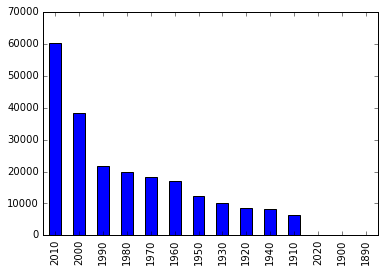

In [9]:
titles['decade'] = titles.year.map(lambda year: year // 10 * 10) # allows us to get decades 
# created decade column and applied function to each element in year
titles.decade.value_counts().plot(kind='bar') # gives values in order of value counts

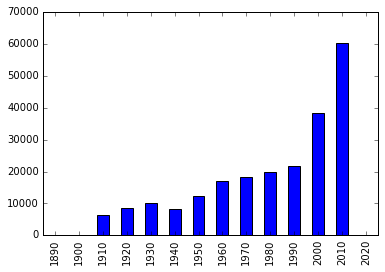

In [10]:
titles['decade'] = titles.year.map(lambda year: year // 10 * 10) # allows us to get decades 
# created decade column and applied function to each element in year
titles.decade.value_counts().sort_index().plot(kind='bar') # sort_index sorts the index

### Plot the number of "Hamlet" films made each decade.

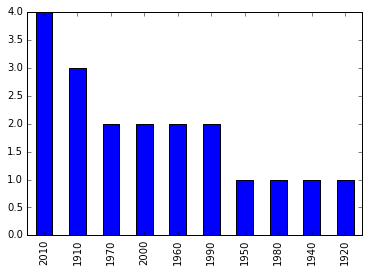

In [11]:
titles[titles.title == "Hamlet"].decade.value_counts().plot(kind='bar') 

In [12]:
cast.head(10)

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN
5,Townbiz,2010,Too $hort,actor,Himself,NaN
6,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
7,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN
8,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8
9,Little Angel (Angelita),2015,Michael 'babeepower' Viera,actor,Chico,9


### Plot the number of "Rustler" characters in each decade of the history of film.

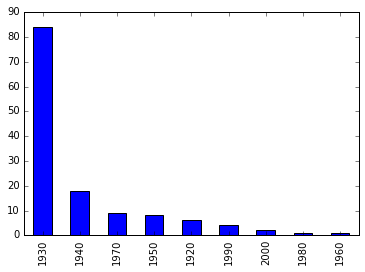

In [13]:
cast['decade'] = cast.year.map(lambda year: year // 10 * 10)
cast[cast.character == "Rustler"].decade.value_counts().plot(kind='bar') 

### Plot the number of "Hamlet" characters each decade.

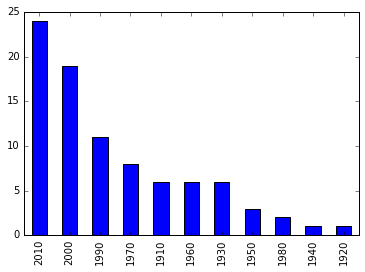

In [14]:
cast[cast.character == "Hamlet"].decade.value_counts().plot(kind='bar') 

### What are the 11 most common character names in movie history?

In [19]:
cast.character.value_counts().head(11)

Himself        18952
Dancer         11541
Extra           9847
Reporter        7846
Doctor          7119
Student         6668
Policeman       6662
Party Guest     6410
Nurse           6348
Bartender       6328
Minor Role      6103
Name: character, dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [15]:
cast[cast.character == 'Herself'].name.value_counts().head(10)

Joyce Brothers        14
Queen Elizabeth II    11
Lili?n Garc?a          7
Mary Jo Pehl           7
Margaret Thatcher      7
Joan Rivers            6
Caroline Rhea          5
Hillary Clinton        5
Bunny Yeager           5
Kareena Kapoor         5
Name: name, dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [20]:
cast[cast.character == 'Himself'].name.value_counts().head(10)

Adolf Hitler             96
Richard Nixon            43
Ronald Reagan            34
John F. Kennedy          27
Ron Jeremy               24
George W. Bush           21
Franklin D. Roosevelt    20
Bill Clinton             20
Benito Mussolini         20
Winston Churchill        20
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [37]:
movies_1945 = cast[cast.year == 1945]
movies_1945
most_in1945 = movies_1945.name.value_counts().head(1)
most_in1945

Emmett Vogan    39
Name: name, dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [38]:
movies_1985 = cast[cast.year == 1985]
most_in1985 = movies_1985.name.value_counts().head(1)
most_in1985

Mammootty    21
Name: name, dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

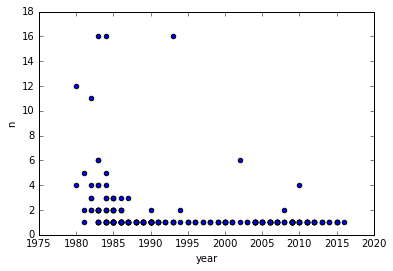

In [63]:
mamootty = cast[cast.name == "Mammootty"].sort_values(by ='year')
mamootty.plot(x = 'year' , y = 'n', kind = 'scatter')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [47]:
patrons_in = cast[cast['character'].str.contains("Patron in")].character.value_counts().head(10)
patrons_in    

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       9
Patron in Billiard Parlor        5
Patron in Bar                    4
Patron in cabaret                3
Patron in Restaurant             3
Patron in Club                   3
Patron in restaurant             3
Busted Patron in Raid            2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [48]:
science = cast[cast['character'].str.contains("Science")].character.value_counts().head(10)
science 

Science Teacher                            56
The Science Fair Contestants & Families     9
Science Student                             9
Science Fair Student                        9
Science Reporter                            5
Science Fair Judge                          5
Science Club Member                         5
Science Promo Cadet                         4
Science Kid                                 4
Science teacher                             3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

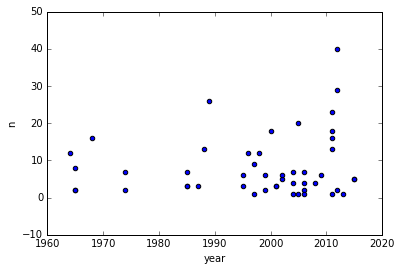

In [66]:
dench = cast[cast.name == "Judi Dench"].sort_values(by ='year')
dench.plot(x = 'year' , y = 'n', kind = 'scatter')

### Plot the n-values of Cary Grant's roles through his career.

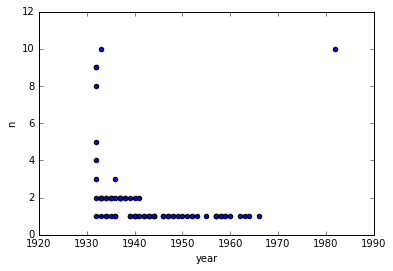

In [69]:
#cast[cast.name == "Cary Grant"].n.value_counts().plot( x = 'year', y = 'n', kind='bar') 
cast[cast.name == "Cary Grant"].plot( x = 'year', y = 'n', kind='scatter') 

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

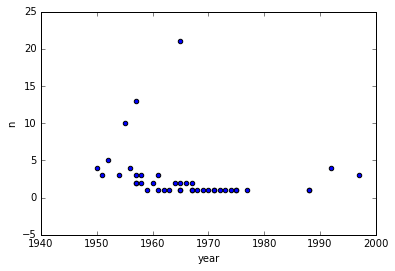

In [70]:
cast[cast.name == "Sidney Poitier"].plot( x = 'year', y = 'n', kind='scatter') 

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [72]:
roles_1950s = cast[cast.year // 10 ==195]

In [81]:
lead_roles = roles_1950s[roles_1950s.n == 1]
lead_roles.type.value_counts()

actor      6467
actress    2872
Name: type, dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?

In [82]:
support_roles = roles_1950s[roles_1950s.n == 2]
support_roles.type.value_counts()

actress    4463
actor      4446
Name: type, dtype: int64